In [1]:
import requests
from bs4 import BeautifulSoup
myBaseUrl = "https://www.amazon.com/Weighted-Base-Dysphagia-Cup-Almond/product-reviews/B0002ECFRU/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber="
# for different product change this base url, should end with page number = 
start_urls = []
for i in range(1, 3): # for different product change second number in range to number of review pages + 1
    start_urls.append(myBaseUrl + str(i))

HEADERS = {
    'authority': 'fls-na.amazon.com',
'method' : 'GET',
'path' : '/1/batch/1/OP/ATVPDKIKX0DER:139-0997389-0276609:EE2RV8A8P7QZQWSMJM81$uedata=s:%2Frd%2Fuedata%3Fld%26v%3D0.215337.0%26id%3DEE2RV8A8P7QZQWSMJM81%26sw%3D1536%26sh%3D864%26vw%3D779%26vh%3D738%26m%3D1%26sc%3DEE2RV8A8P7QZQWSMJM81%26ue%3D2%26bb%3D63%26ns%3D68%26ne%3D118%26af%3D118%26cf%3D248%26be%3D341%26fp%3D71%26fcp%3D71%26pc%3D1365%26tc%3D-175%26na_%3D-175%26ul_%3D-48%26_ul%3D-48%26rd_%3D-1612360924135%26_rd%3D-1612360924135%26fe_%3D-173%26lk_%3D-173%26_lk%3D-173%26co_%3D-173%26_co%3D-173%26sc_%3D-1612360924135%26rq_%3D-168%26rs_%3D-95%26_rs%3D133%26dl_%3D-39%26di_%3D350%26de_%3D350%26_de%3D378%26_dc%3D1364%26ld_%3D1365%26_ld%3D-1612360924135%26ntd%3D-1%26ty%3D1%26rc%3D0%26hob%3D1%26hoe%3D2%26ld%3D1365%26t%3D1612360925500%26ctb%3D1%26rt%3Dcf%3A16-4-3-4-2-16-0_af%3A12-1-3-3-2-12-1_ld%3A34-6-3-6-4-23-0%26csmtags%3Daui%7Caui%3Aaui_build_date%3A3.20.8-2021-01-27%7Cewc%3Aunpersist%7Cewc%3Aunpersist%3Aemptycart%7Cewc%3Abview%7Cewc%7Cewc%3Aprime%7Cewc%3Acartsize%3A0%7Cewc%3Aaui%7Cnavbar%7Cfls-na-amazon-com%7Cadblk_no%7CABPStatusNotEnabled%3ACustomerReviews%3Aright-ad-1%3AProduct%7Ciss-on-time%7Cadrender%3ACustomerReviews%3Aright-ad-1%3AProduct%7Cadrender%3Ad5a09d1b-62af-4f33-a96a-d339a8e84d93%7Cadrender%3ACustomerReviews%3Aright-ad-1%3AProduct%3Acreativeid%3A17003937701%7Cadrender%3Ad5a09d1b-62af-4f33-a96a-d339a8e84d93%3Acreativeid%3A17003937701%7Cadrender%3ACustomerReviews%3Aright-ad-1%3AProduct%3Aprogramid%3A1004%7Cadrender%3Ad5a09d1b-62af-4f33-a96a-d339a8e84d93%3Aprogramid%3A1004%7Cadrender%3ACustomerReviews%3Aright-ad-1%3AProduct%3Acreativetemplatename%3Aimage%7Cadrender%3Ad5a09d1b-62af-4f33-a96a-d339a8e84d93%3Acreativetemplatename%3Aimage%26viz%3Dvisible%3A1%26pty%3DCustomerReviews%26spty%3DremoteProduct%26pti%3DB0002ECFRU%26tid%3DHPZXB0930WXTM9QYEJQV%26aftb%3D1%26ui%3D3:1367',
'scheme' : 'https',
'accept':'*/*',
'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
    
}
response = []
for i in start_urls:
    response.append(requests.get(i,headers=HEADERS))

In [2]:
print(response) #response 200 means success

[<Response [200]>, <Response [200]>]


In [3]:
#collects soup data
soups = []
for i in response:
    soups.append(BeautifulSoup(i.content))
    
#collects and cleans review data
reviews = []
for soup in soups:
    review = soup.findAll("span",{'class':"a-size-base review-text review-text-content"})
    for i in review:
        reviews.append(i.text)
strippedreviews = []
for review in reviews:
    strippedreviews.append(review.strip())

In [4]:
finalstars = []
for soup in soups:
    star = soup.findAll(attrs = {'data-hook':"review-star-rating"})
    for i in star: 
        finalstars.append(i.text)

In [5]:
#collects and cleans title data 
titles = []
for soup in soups:
    title = soup.findAll("a",{'class':"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"})
    for i in title:
        titles.append(i.text)
strippedtitles = []
for title in titles:
    strippedtitles.append(title.strip())

In [6]:
#creates a csv file with title and review data 
import pandas as pd    

df = pd.DataFrame(strippedtitles, columns=["title"])   
df.to_csv('soupiweightedbase.csv', index=False)  #change name of csv file as needed 
read = pd.read_csv("soupiweightedbase.csv")
read["review"] = strippedreviews
read.to_csv("soupiweightedbase.csv", index=False)
read["star"] = finalstars
read.to_csv("soupiweightedbase.csv", index=False)
df = pd.read_csv("soupiweightedbase.csv")

In [7]:
#runs sentiment analysis on collected data in csv file
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,title,review,star,polarity,subjectivity
0,Good option for person with swallowing/head ti...,I bought one of these for my mother who suffer...,4.0 out of 5 stars,0.060931,0.433442
1,"She has very painful hands, wrist",I bought this mug to help my 80 year old mom w...,5.0 out of 5 stars,0.115541,0.698052
2,This is a good cup for my 92 year old dad who ...,This is a good cup for my 92 year old dad who ...,5.0 out of 5 stars,0.366786,0.471429
3,Dysphagia Cup,This is a good example of considered industria...,5.0 out of 5 stars,-0.015097,0.564010
4,Excellent cup for those that need help with dr...,"Sturdy plastic cup that won't tip over, thanks...",5.0 out of 5 stars,0.053571,0.307143
5,Great Product,Thank you for this cup. My mother had a strok...,5.0 out of 5 stars,0.142857,0.317857
6,Great cup,Great cup for people like my husband who had a...,5.0 out of 5 stars,0.366667,0.516667
7,Love them,Love them - wish I could have ordered other th...,5.0 out of 5 stars,0.312778,0.658333
8,tippy,"Cup seemed like it would tip over easily, retu...",2.0 out of 5 stars,0.477778,0.811111
9,Two Stars,First time it was washed (by hand no less) it ...,2.0 out of 5 stars,-0.155556,0.466667


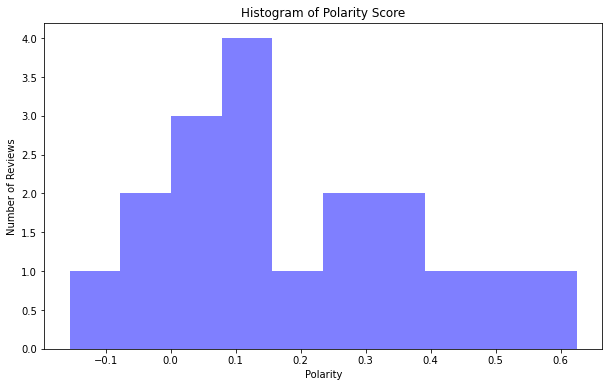

In [8]:
import matplotlib.pyplot as plt
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [9]:
mean1 = df['polarity'].mean()
print("Mean of Polarity: ", mean1)
median1 = df['polarity'].median()
print("Median of Polarity: ", median1)

Mean of Polarity:  0.19320222779628765
Median of Polarity:  0.14459776334776334


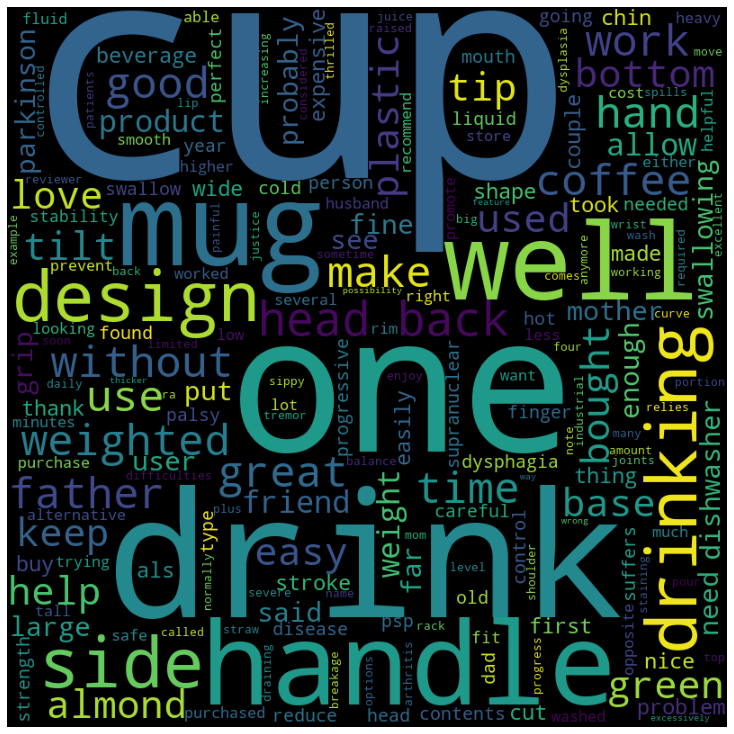

In [10]:

from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
comment_words = ""
for i in df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

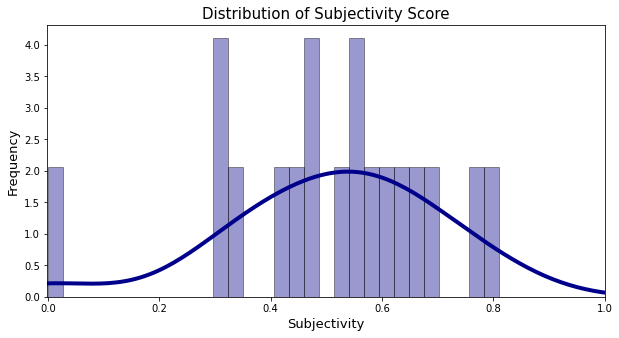

In [11]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)